In [1]:
import pandas as pd

In [2]:
import os
import pandas as pd
dfs = []  # Create an empty list to store dataframes

# Example: Read multiple CSV files
arr_dep_dir = '../data/MBTA_Website/MBTA_Bus_Arrival_Departure_Times_2023/'
csv_files = os.listdir(arr_dep_dir)
csv_files = [os.path.join(arr_dep_dir, i) for i in csv_files][:6] 
for f in csv_files:
    df = pd.read_csv(f)
    dfs.append(df)

df = pd.concat(dfs, axis=0, ignore_index=True)
df.head()

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-01-01,01,Inbound,58061899.0,110,hhgat,1,Startpoint,Schedule,1900-01-01T06:05:00Z,1900-01-01T06:05:04Z,NaN,NaN
1,2023-01-01,01,Inbound,58061899.0,67,maput,2,Midpoint,Schedule,1900-01-01T06:09:00Z,1900-01-01T06:06:28Z,NaN,NaN
2,2023-01-01,01,Inbound,58061899.0,72,cntsq,3,Midpoint,Schedule,1900-01-01T06:12:00Z,1900-01-01T06:08:57Z,NaN,NaN
3,2023-01-01,01,Inbound,58061899.0,75,mit,4,Midpoint,Schedule,1900-01-01T06:15:00Z,1900-01-01T06:12:41Z,NaN,NaN
4,2023-01-01,01,Inbound,58061899.0,79,hynes,5,Midpoint,Schedule,1900-01-01T06:19:00Z,1900-01-01T06:16:35Z,NaN,NaN


In [3]:
file_path = '../data/2015-2019_neighborhood_tables_2021.12.21.xlsm'

# Get the sheet names in the Excel file
xl = pd.ExcelFile(file_path)
sheet_names = xl.sheet_names

# Create a dictionary to store data frames for each sheet
dfs = {}

# Loop through each sheet and read it into a data frame
for sheet_name in sheet_names:
    print(f'Reading sheet: {sheet_name}')
    df2 = xl.parse(sheet_name)  # You can use parse with sheet_name or parse with sheet index
    dfs[sheet_name] = df2

Reading sheet: Age
Reading sheet: Household Type
Reading sheet: Race
Reading sheet: Group Quarters Population
Reading sheet: Nativity
Reading sheet: Geographic Mobility
Reading sheet: Educational Attainment
Reading sheet: School Enrollment
Reading sheet: Means of Commuting
Reading sheet: Travel Time to Work
Reading sheet: Place of Work
Reading sheet: Per Capita Income
Reading sheet: Occupation
Reading sheet: Industries
Reading sheet: Labor Force
Reading sheet: Household Income
Reading sheet: Family Income
Reading sheet: Housing Tenure
Reading sheet: Bedrooms
Reading sheet: Vacancy Rates
Reading sheet: Vehicles per Household
Reading sheet: Poverty Rates
Reading sheet: Poverty Rates by Age


In [4]:
neighborhood_data = {
    'Place': ['Allston', 'Back Bay', 'Beacon Hill', 'Brighton', 'Charlestown', 'Chinatown', 'Dorchester', 'Downtown',
              'East Boston', 'Fenway', 'Hyde Park', 'Jamaica Plain', 'Longwood', 'Mattapan', 'Mission Hill', 'North End',
              'Roslindale', 'Roxbury', 'South Boston', 'South Boston Waterfront', 'South End', 'West End', 'West Roxbury'],
    'Latitude': [42.355537, 42.350707, 42.358708, 42.3489, 42.3787, 42.3492, 42.2995, 42.3555, 42.375097,
                 42.345187, 42.2557, 42.311605, 42.3389, 42.272321, 42.333265, 42.365097, 42.291209, 42.3126,
                 42.333431, 42.351938, 42.341310, 42.363919, 42.279265],
    'Longitude': [-71.132749, -71.079730, -71.067829, -71.1605, -71.0616, -71.0621, -71.0649, -71.0565, -71.039217,
                  -71.104599, -71.1256, -71.114384, -71.1072, -71.086995, -71.102029, -71.054495, -71.124497, -71.0899,
                  -71.049495, -71.049883, -71.077230, -71.063899, -71.149497],
}


In [5]:
neighborhood_data_df = pd.DataFrame(neighborhood_data)

neighborhood_data_df.head()

,Place,Latitude,Longitude
0,Allston,42.355537,-71.132749
1,Back Bay,42.350707,-71.079730
2,Beacon Hill,42.358708,-71.067829
3,Brighton,42.348900,-71.160500
4,Charlestown,42.378700,-71.061600


In [6]:
import json
bus_stops_data = json.load(open('/Users/xavierohan/Documents/GitHub/ds-boston-transit-performance/fa23-team-d/data/stops.json'))

In [7]:
import pandas as pd
from geopy.distance import geodesic

# Given data
neighborhood_data = {
    'Place': ['Allston', 'Back Bay', 'Beacon Hill', 'Brighton', 'Charlestown', 'Chinatown', 'Dorchester', 'Downtown',
              'East Boston', 'Fenway', 'Hyde Park', 'Jamaica Plain', 'Longwood', 'Mattapan', 'Mission Hill', 'North End',
              'Roslindale', 'Roxbury', 'South Boston', 'South Boston Waterfront', 'South End', 'West End', 'West Roxbury'],
    'Latitude': [42.355537, 42.350707, 42.358708, 42.3489, 42.3787, 42.3492, 42.2995, 42.3555, 42.375097,
                 42.345187, 42.2557, 42.311605, 42.3389, 42.272321, 42.333265, 42.365097, 42.291209, 42.3126,
                 42.333431, 42.351938, 42.341310, 42.363919, 42.279265],
    'Longitude': [-71.132749, -71.079730, -71.067829, -71.1605, -71.0616, -71.0621, -71.0649, -71.0565, -71.039217,
                  -71.104599, -71.1256, -71.114384, -71.1072, -71.086995, -71.102029, -71.054495, -71.124497, -71.0899,
                  -71.049495, -71.049883, -71.077230, -71.063899, -71.149497],
}


# Assign neighborhood to each bus stop and count stops for each neighborhood
neighborhood_counts = {neighborhood: 0 for neighborhood in neighborhood_data['Place']}
for stop, stop_data in bus_stops_data.items():
    min_distance = float('inf')
    closest_neighborhood = None

    for i, neighborhood in enumerate(neighborhood_data['Place']):
        distance = geodesic((stop_data['latitude'], stop_data['longitude']), (neighborhood_data['Latitude'][i], neighborhood_data['Longitude'][i])).meters

        if distance < min_distance:
            min_distance = distance
            closest_neighborhood = neighborhood

    bus_stops_data[stop]['neighbourhood'] = closest_neighborhood
    neighborhood_counts[closest_neighborhood] += 1


# Add a new column "num_stops" to neighborhood_data_df
neighborhood_data_df['num_stops'] = neighborhood_data_df['Place'].map(neighborhood_counts)

# Display the updated DataFrame
print(neighborhood_data_df)


                      Place   Latitude  Longitude  num_stops
0                   Allston  42.355537 -71.132749        507
1                  Back Bay  42.350707 -71.079730         49
2               Beacon Hill  42.358708 -71.067829          7
3                  Brighton  42.348900 -71.160500        730
4               Charlestown  42.378700 -71.061600        876
5                 Chinatown  42.349200 -71.062100         30
6                Dorchester  42.299500 -71.064900        487
7                  Downtown  42.355500 -71.056500         26
8               East Boston  42.375097 -71.039217       1229
9                    Fenway  42.345187 -71.104599         66
10                Hyde Park  42.255700 -71.125600        375
11            Jamaica Plain  42.311605 -71.114384         66
12                 Longwood  42.338900 -71.107200         40
13                 Mattapan  42.272321 -71.086995        715
14             Mission Hill  42.333265 -71.102029         78
15                North 

In [8]:
means_of_comm = {
    'Boston': {'Total Public Transit': '33.2%', 'Bus': '13.5%', 'Subway or Train': '19.7%'},
    'Allston': {'Total Public Transit': '38.2%', 'Bus': '18.8%', 'Subway or Train': '19.4%'},
    'Back Bay': {'Total Public Transit': '24.8%', 'Bus': '2.9%', 'Subway or Train': '21.9%'},
    'Beacon Hill': {'Total Public Transit': '20.3%', 'Bus': '2.2%', 'Subway or Train': '18.1%'},
    'Brighton': {'Total Public Transit': '33.1%', 'Bus': '14.5%', 'Subway or Train': '18.7%'},
    'Charlestown': {'Total Public Transit': '25.3%', 'Bus': '12.3%', 'Subway or Train': '12.9%'},
    'Dorchester': {'Total Public Transit': '36.5%', 'Bus': '19.6%', 'Subway or Train': '16.8%'},
    'Downtown': {'Total Public Transit': '20.1%', 'Bus': '2.6%', 'Subway or Train': '17.5%'},
    'East Boston': {'Total Public Transit': '53.6%', 'Bus': '4.7%', 'Subway or Train': '49.0%'},
    'Fenway': {'Total Public Transit': '26.3%', 'Bus': '11.0%', 'Subway or Train': '15.2%'},
    'Hyde Park': {'Total Public Transit': '24.6%', 'Bus': '12.1%', 'Subway or Train': '12.4%'},
    'Jamaica Plain': {'Total Public Transit': '41.8%', 'Bus': '9.9%', 'Subway or Train': '31.9%'},
    'Longwood': {'Total Public Transit': '14.4%', 'Bus': '6.5%', 'Subway or Train': '7.9%'},
    'Mattapan': {'Total Public Transit': '33.4%', 'Bus': '20.0%', 'Subway or Train': '13.4%'},
    'Mission Hill': {'Total Public Transit': '38.6%', 'Bus': '10.4%', 'Subway or Train': '28.2%'},
    'North End': {'Total Public Transit': '23.9%', 'Bus': '0.9%', 'Subway or Train': '23.1%'},
    'Roslindale': {'Total Public Transit': '29.4%', 'Bus': '9.4%', 'Subway or Train': '20.0%'},
    'Roxbury': {'Total Public Transit': '41.9%', 'Bus': '31.2%', 'Subway or Train': '10.7%'},
    'South Boston': {'Total Public Transit': '36.6%', 'Bus': '22.6%', 'Subway or Train': '14.0%'},
    'South Boston Waterfront': {'Total Public Transit': '18.3%', 'Bus': '6.9%', 'Subway or Train': '11.4%'},
    'South End': {'Total Public Transit': '25.8%', 'Bus': '8.5%', 'Subway or Train': '17.3%'},
    'West End': {'Total Public Transit': '22.0%', 'Bus': '3.0%', 'Subway or Train': '19.0%'},
    'West Roxbury': {'Total Public Transit': '18.6%', 'Bus': '6.7%', 'Subway or Train': '11.9%'}
}
# data from https://data.boston.gov/dataset/neighborhood-demographics/resource/d8c23c6a-b868-4ba4-8a3b-b9615a21be07

meanas_of_comm_df = pd.DataFrame(means_of_comm).transpose()
means_of_comm_df = meanas_of_comm_df.reset_index()
means_of_comm_df.columns = ['Neighborhood', 'Total Public Transit', 'Bus', 'Subway or Train']
means_of_comm_df.head()

,Neighborhood,Total Public Transit,Bus,Subway or Train
0,Boston,33.2%,13.5%,19.7%
1,Allston,38.2%,18.8%,19.4%
2,Back Bay,24.8%,2.9%,21.9%
3,Beacon Hill,20.3%,2.2%,18.1%
4,Brighton,33.1%,14.5%,18.7%


In [9]:
combined_df = pd.merge(neighborhood_data_df, means_of_comm_df, left_on='Place', right_on='Neighborhood', how='outer')

# Drop the redundant 'Neighborhood' column
combined_df = combined_df.drop(columns='Neighborhood')

combined_df['Bus'] = pd.to_numeric(combined_df['Bus'].str.rstrip('%'))
# Display the combined dataframe
# print(combined_df[['Place', 'num_stops', 'Bus']].dropna().sort_values(by='Bus', ascending=False))

from tabulate import tabulate

# Assuming 'combined_df' is the combined dataframe
table = tabulate(combined_df[['Place', 'num_stops', 'Bus']].dropna().sort_values(by='Bus', ascending=False),
                 headers='keys', tablefmt='pretty', showindex=False)

print(table)

+-------------------------+-----------+------+
|          Place          | num_stops | Bus  |
+-------------------------+-----------+------+
|         Roxbury         |   130.0   | 31.2 |
|      South Boston       |   144.0   | 22.6 |
|        Mattapan         |   715.0   | 20.0 |
|       Dorchester        |   487.0   | 19.6 |
|         Allston         |   507.0   | 18.8 |
|        Brighton         |   730.0   | 14.5 |
|       Charlestown       |   876.0   | 12.3 |
|        Hyde Park        |   375.0   | 12.1 |
|         Fenway          |   66.0    | 11.0 |
|      Mission Hill       |   78.0    | 10.4 |
|      Jamaica Plain      |   66.0    | 9.9  |
|       Roslindale        |   104.0   | 9.4  |
|        South End        |   85.0    | 8.5  |
| South Boston Waterfront |   28.0    | 6.9  |
|      West Roxbury       |   234.0   | 6.7  |
|        Longwood         |   40.0    | 6.5  |
|       East Boston       |  1229.0   | 4.7  |
|        West End         |   12.0    | 3.0  |
|        Back

In [10]:
df_neighborhoods = pd.DataFrame(neighborhood_data)
stop_data = pd.read_csv('/Users/xavierohan/Documents/GitHub/ds-boston-transit-performance/fa23-team-d/data/stops_locations.csv') 
# Function to calculate the distance between two points using Haversine formula
def haversine(coord1, coord2):
    return geodesic(coord1, coord2).miles

# Function to find the closest neighborhood to a stop
def find_neighborhood(stop_coord):
    distances = df_neighborhoods.apply(lambda row: haversine(stop_coord, (row['Latitude'], row['Longitude'])), axis=1)
    closest_neighborhood = df_neighborhoods.loc[distances.idxmin(), 'Place']
    return closest_neighborhood

# Assuming that the column 'route_id' represents the routes passing through stops
# Create a new column 'Neighborhood' in df_stops to store the assigned neighborhood for each stop
stop_data['Neighborhood'] = stop_data.apply(lambda row: find_neighborhood((row['X'], row['Y'])), axis=1)


# Group stops by route_id and aggregate the list of unique neighborhoods for each route_id
neighborhoods_by_stop = stop_data.groupby('stop_id')['Neighborhood'].unique().reset_index()
neighborhoods_by_stop['Neighborhood'] = neighborhoods_by_stop['Neighborhood'].apply(lambda x: x[0] if x else '')
# Now, neighborhoods_by_route contains the routes and associated neighborhoods
print(neighborhoods_by_stop)

      stop_id Neighborhood
0           1    South End
1           2    South End
2           3    South End
3           4    South End
4           5    South End
...       ...          ...
5798   109901  East Boston
5799   109912  East Boston
5800   869411     Brighton
5801   869451     Brighton
5802   883321     Brighton

[5803 rows x 2 columns]


In [11]:
route_ranking = pd.read_csv('/Users/xavierohan/Documents/GitHub/ds-boston-transit-performance/fa23-team-d/data/route_ranking.csv')

stop_ids_by_route = df.groupby('route_id').agg({'stop_id': 'unique', 'time_point_order': 'unique'}).reset_index()
# Define the list of route_ids you want to visualize
route_ids = route_ranking[-5:]['route_id'].values 

top_10_most_late_routes_neighbourhoods = []
unique_neighborhoods_by_route = {}
for route_id in route_ids:
    # Get the list of stop_ids for the route
    stop_ids = stop_ids_by_route.loc[stop_ids_by_route['route_id'] == route_id, 'stop_id'].values[0]
    # Get the list of neighborhoods for the route
    neighborhoods = neighborhoods_by_stop[neighborhoods_by_stop['stop_id'].isin(stop_ids)]['Neighborhood'].unique()
    for neighborhood in neighborhoods:
        if neighborhood not in top_10_most_late_routes_neighbourhoods:
            top_10_most_late_routes_neighbourhoods.append(neighborhood)
    # Print the route_id and associated neighborhoods
    print(f'{route_id}: {neighborhoods}')
    if route_id not in unique_neighborhoods_by_route:
        unique_neighborhoods_by_route[route_id] = neighborhoods.tolist()
    else:
        unique_neighborhoods_by_route[route_id].extend(neighborhoods.tolist())
print(unique_neighborhoods_by_route)

47: ['South End' 'Fenway' 'Chinatown' 'Longwood' 'Mission Hill']
65: ['Fenway' 'Brighton' 'Allston' 'Longwood']
76: ['Allston' 'Brighton']
44: ['Roxbury' 'Mission Hill' 'South End']
CT2: ['Fenway' 'Longwood' 'Mission Hill' 'Charlestown' 'Back Bay' 'South End']
{'47': ['South End', 'Fenway', 'Chinatown', 'Longwood', 'Mission Hill'], '65': ['Fenway', 'Brighton', 'Allston', 'Longwood'], '76': ['Allston', 'Brighton'], '44': ['Roxbury', 'Mission Hill', 'South End'], 'CT2': ['Fenway', 'Longwood', 'Mission Hill', 'Charlestown', 'Back Bay', 'South End']}


In [12]:
top_10_most_late_routes_neighbourhoods

['South End',
 'Fenway',
 'Chinatown',
 'Longwood',
 'Mission Hill',
 'Brighton',
 'Allston',
 'Roxbury',
 'Charlestown',
 'Back Bay']

In [13]:
route_ranking = pd.read_csv('/Users/xavierohan/Documents/GitHub/ds-boston-transit-performance/fa23-team-d/data/route_ranking.csv')

stop_ids_by_route = df.groupby('route_id').agg({'stop_id': 'unique', 'time_point_order': 'unique'}).reset_index()
# Define the list of route_ids you want to visualize
route_ids = route_ranking[:5]['route_id'].values 

top_10_on_time_routes_neighbourhoods = []
unique_neighborhoods_by_route = {}
for route_id in route_ids:
    # Get the list of stop_ids for the route
    stop_ids = stop_ids_by_route.loc[stop_ids_by_route['route_id'] == route_id, 'stop_id'].values[0]
    # Get the list of neighborhoods for the route
    neighborhoods = neighborhoods_by_stop[neighborhoods_by_stop['stop_id'].isin(stop_ids)]['Neighborhood'].unique()
    for neighborhood in neighborhoods:
        if neighborhood not in top_10_on_time_routes_neighbourhoods:
            top_10_on_time_routes_neighbourhoods.append(neighborhood)
    # Print the route_id and associated neighborhoods
    print(f'{route_id}: {neighborhoods}')
    if route_id not in unique_neighborhoods_by_route:
        unique_neighborhoods_by_route[route_id] = neighborhoods.tolist()
    else:
        unique_neighborhoods_by_route[route_id].extend(neighborhoods.tolist())
print(unique_neighborhoods_by_route)

746_: ['Downtown' 'South Boston Waterfront']
171: ['South Boston' 'South End' 'East Boston']
SL2: ['South Boston Waterfront' 'Downtown']
SL1: ['Downtown' 'East Boston' 'South Boston Waterfront']
351: ['Brighton']
{'746_': ['Downtown', 'South Boston Waterfront'], '171': ['South Boston', 'South End', 'East Boston'], 'SL2': ['South Boston Waterfront', 'Downtown'], 'SL1': ['Downtown', 'East Boston', 'South Boston Waterfront'], '351': ['Brighton']}


In [14]:
top_10_on_time_routes_neighbourhoods

['Downtown',
 'South Boston Waterfront',
 'South Boston',
 'South End',
 'East Boston',
 'Brighton']

In [15]:
age_data = {
    'Allston': {'Population': 19261, 'Median Age': 27.5},
    'Brighton': {'Population': 55297, 'Median Age': 30.8},
    'Charlestown': {'Population': 19890, 'Median Age': 35.7},
    'Dorchester': {'Population': 126909, 'Median Age': 33.4},
    'Downtown': {'Population': 18306, 'Median Age': 33.5},
    'East Boston': {'Population': 47263, 'Median Age': 30.6},
    'Fenway': {'Population': 33489, 'Median Age': 26.3},
    'Hyde Park': {'Population': 38924, 'Median Age': 39.4},
    'Jamaica Plain': {'Population': 40867, 'Median Age': 34.8},
    'Longwood': {'Population': 5351, 'Median Age': 20.2},
    'Mattapan': {'Population': 26659, 'Median Age': 36.7},
    'Mission Hill': {'Population': 17386, 'Median Age': 30.1},
    'North End': {'Population': 8749, 'Median Age': 31.1},
    'Roslindale': {'Population': 30021, 'Median Age': 39.8},
    'Roxbury': {'Population': 54161, 'Median Age': 32.5},
    'South Boston': {'Population': 36772, 'Median Age': 31.9},
    'South Boston Waterfront': {'Population': 4403, 'Median Age': 34.5},
    'South End': {'Population': 32571, 'Median Age': 37.1},
    'West End': {'Population': 6619, 'Median Age': 37.8},
    'West Roxbury': {'Population': 33526, 'Median Age': 42.8}
}

In [16]:
age_data_df = pd.DataFrame(age_data).transpose()
age_data_df = age_data_df.reset_index()
age_data_df.columns = ['Neighborhood', 'Population', 'Median Age']

combined_df = pd.merge(neighborhood_data_df, age_data_df, left_on='Place', right_on='Neighborhood', how='outer')

combined_df['Median Age'] = pd.to_numeric(combined_df['Median Age'])
# Display the combined dataframe
# print(combined_df[['Place', 'num_stops', 'Bus']].dropna().sort_values(by='Bus', ascending=False))
combined_df = combined_df[['Place', 'num_stops', 'Median Age']].dropna().sort_values(by='Median Age', ascending=False)
from tabulate import tabulate

# Assuming 'combined_df' is the combined dataframe
table = tabulate(combined_df,headers='keys', tablefmt='pretty', showindex=False)

print(table)

+-------------------------+-----------+------------+
|          Place          | num_stops | Median Age |
+-------------------------+-----------+------------+
|      West Roxbury       |    234    |    42.8    |
|       Roslindale        |    104    |    39.8    |
|        Hyde Park        |    375    |    39.4    |
|        West End         |    12     |    37.8    |
|        South End        |    85     |    37.1    |
|        Mattapan         |    715    |    36.7    |
|       Charlestown       |    876    |    35.7    |
|      Jamaica Plain      |    66     |    34.8    |
| South Boston Waterfront |    28     |    34.5    |
|        Downtown         |    26     |    33.5    |
|       Dorchester        |    487    |    33.4    |
|         Roxbury         |    130    |    32.5    |
|      South Boston       |    144    |    31.9    |
|        North End        |    12     |    31.1    |
|        Brighton         |    730    |    30.8    |
|       East Boston       |   1229    |    30.

['West Roxbury' 'Roslindale' 'Hyde Park' 'West End' 'South End' 'Mattapan'
 'Charlestown' 'Jamaica Plain' 'South Boston Waterfront' 'Downtown'
 'Dorchester' 'Roxbury' 'South Boston' 'North End' 'Brighton'
 'East Boston' 'Mission Hill' 'Allston' 'Fenway' 'Longwood']
['South End', 'Fenway', 'Longwood', 'Mission Hill', 'Brighton', 'Allston', 'Roxbury', 'Charlestown']


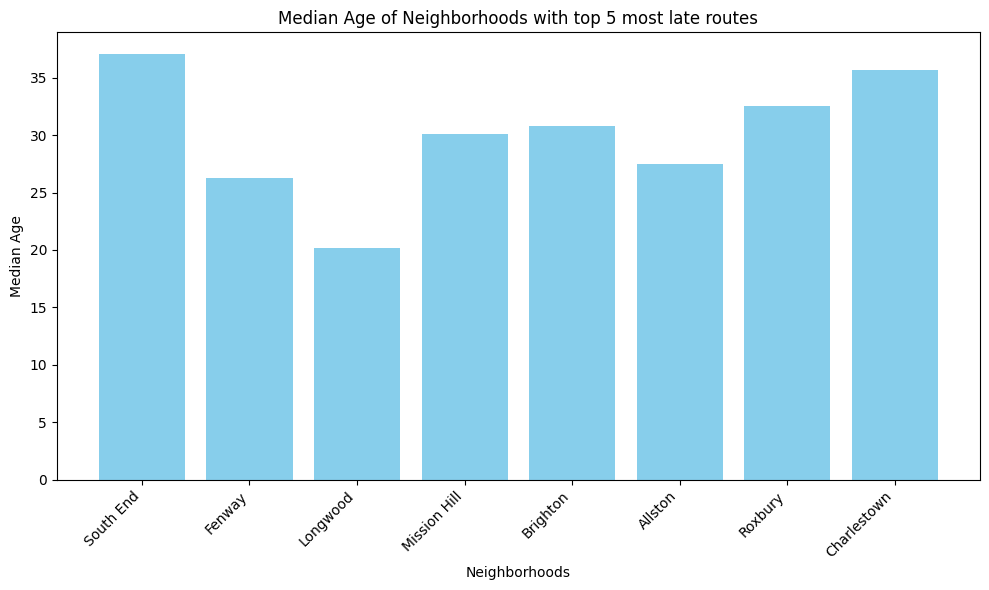

In [17]:
import matplotlib.pyplot as plt
print(combined_df['Place'].values)
top_10_most_late_routes_neighbourhoods = [i for i in top_10_most_late_routes_neighbourhoods if i in combined_df['Place'].values]
print(top_10_most_late_routes_neighbourhoods)
# top 10 most late routes against median age
median_age_list = []
for i in top_10_most_late_routes_neighbourhoods:
    if i in combined_df['Place'].values:
        median_age_list.append(combined_df[combined_df['Place'] == i]['Median Age'].values[0])


plt.figure(figsize=(10, 6))
plt.bar(top_10_most_late_routes_neighbourhoods, median_age_list, color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Median Age')
plt.title('Median Age of Neighborhoods with top 5 most late routes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

['West Roxbury' 'Roslindale' 'Hyde Park' 'West End' 'South End' 'Mattapan'
 'Charlestown' 'Jamaica Plain' 'South Boston Waterfront' 'Downtown'
 'Dorchester' 'Roxbury' 'South Boston' 'North End' 'Brighton'
 'East Boston' 'Mission Hill' 'Allston' 'Fenway' 'Longwood']


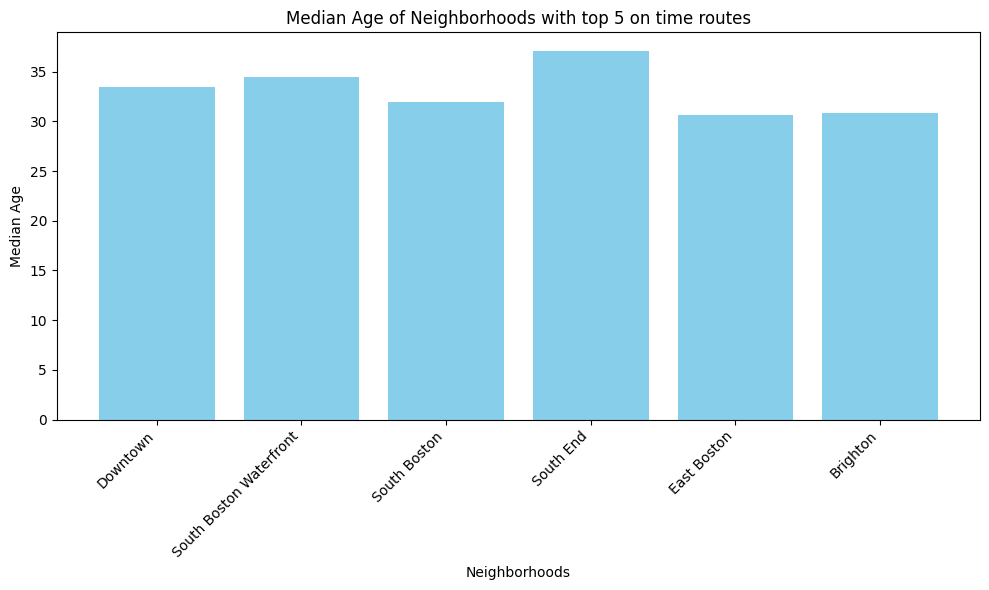

In [18]:
import matplotlib.pyplot as plt
print(combined_df['Place'].values)
top_10_on_time_routes_neighbourhoods = [i for i in top_10_on_time_routes_neighbourhoods if i in combined_df['Place'].values]
# top 10 most late routes against median age
median_age_list = []
for i in top_10_on_time_routes_neighbourhoods:
    if i in combined_df['Place'].values:
        median_age_list.append(combined_df[combined_df['Place'] == i]['Median Age'].values[0])


plt.figure(figsize=(10, 6))
plt.bar(top_10_on_time_routes_neighbourhoods, median_age_list, color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Median Age')
plt.title('Median Age of Neighborhoods with top 5 on time routes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
combined_df = pd.merge(neighborhood_data_df, means_of_comm_df, left_on='Place', right_on='Neighborhood', how='outer')

# Drop the redundant 'Neighborhood' column
combined_df = combined_df.drop(columns='Neighborhood')

combined_df['Bus'] = pd.to_numeric(combined_df['Bus'].str.rstrip('%'))
# Display the combined dataframe
# print(combined_df[['Place', 'num_stops', 'Bus']].dropna().sort_values(by='Bus', ascending=False))

from tabulate import tabulate
combined_df = combined_df[['Place', 'num_stops', 'Bus']].dropna().sort_values(by='Bus', ascending=False)
# Assuming 'combined_df' is the combined dataframe
table = tabulate(combined_df,
                 headers='keys', tablefmt='pretty', showindex=False)

print(table)

+-------------------------+-----------+------+
|          Place          | num_stops | Bus  |
+-------------------------+-----------+------+
|         Roxbury         |   130.0   | 31.2 |
|      South Boston       |   144.0   | 22.6 |
|        Mattapan         |   715.0   | 20.0 |
|       Dorchester        |   487.0   | 19.6 |
|         Allston         |   507.0   | 18.8 |
|        Brighton         |   730.0   | 14.5 |
|       Charlestown       |   876.0   | 12.3 |
|        Hyde Park        |   375.0   | 12.1 |
|         Fenway          |   66.0    | 11.0 |
|      Mission Hill       |   78.0    | 10.4 |
|      Jamaica Plain      |   66.0    | 9.9  |
|       Roslindale        |   104.0   | 9.4  |
|        South End        |   85.0    | 8.5  |
| South Boston Waterfront |   28.0    | 6.9  |
|      West Roxbury       |   234.0   | 6.7  |
|        Longwood         |   40.0    | 6.5  |
|       East Boston       |  1229.0   | 4.7  |
|        West End         |   12.0    | 3.0  |
|        Back

['Roxbury' 'South Boston' 'Mattapan' 'Dorchester' 'Allston' 'Brighton'
 'Charlestown' 'Hyde Park' 'Fenway' 'Mission Hill' 'Jamaica Plain'
 'Roslindale' 'South End' 'South Boston Waterfront' 'West Roxbury'
 'Longwood' 'East Boston' 'West End' 'Back Bay' 'Downtown' 'Beacon Hill'
 'North End']
['South End', 'Fenway', 'Longwood', 'Mission Hill', 'Brighton', 'Allston', 'Roxbury', 'Charlestown']


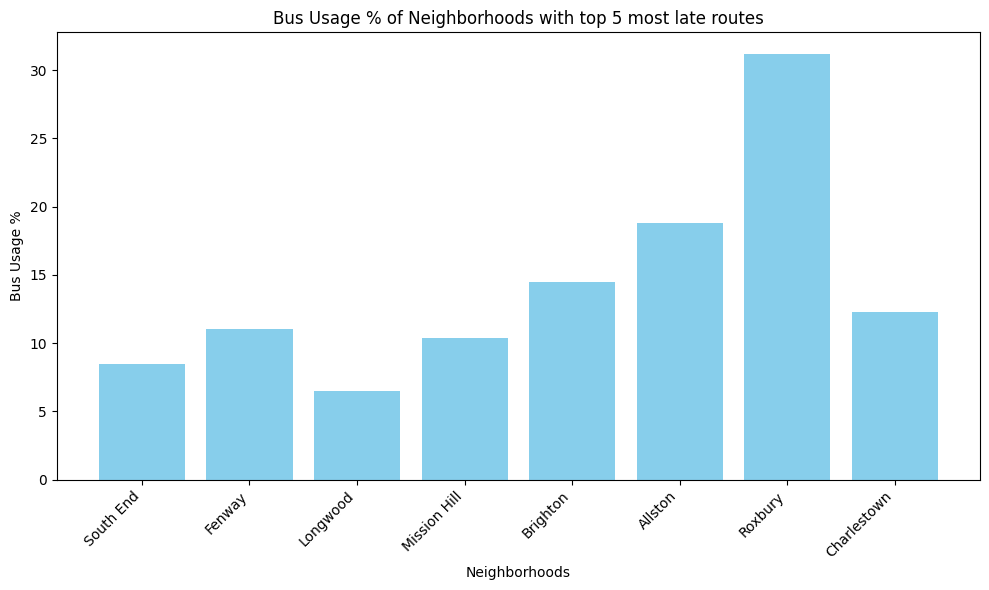

In [20]:
import matplotlib.pyplot as plt
print(combined_df['Place'].values)
top_10_most_late_routes_neighbourhoods = [i for i in top_10_most_late_routes_neighbourhoods if i in combined_df['Place'].values]
print(top_10_most_late_routes_neighbourhoods)
# top 10 most late routes against median age
median_age_list = []
for i in top_10_most_late_routes_neighbourhoods:
    if i in combined_df['Place'].values:
        median_age_list.append(combined_df[combined_df['Place'] == i]['Bus'].values[0])


plt.figure(figsize=(10, 6))
plt.bar(top_10_most_late_routes_neighbourhoods, median_age_list, color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Bus Usage %')
plt.title('Bus Usage % of Neighborhoods with top 5 most late routes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

['Roxbury' 'South Boston' 'Mattapan' 'Dorchester' 'Allston' 'Brighton'
 'Charlestown' 'Hyde Park' 'Fenway' 'Mission Hill' 'Jamaica Plain'
 'Roslindale' 'South End' 'South Boston Waterfront' 'West Roxbury'
 'Longwood' 'East Boston' 'West End' 'Back Bay' 'Downtown' 'Beacon Hill'
 'North End']
['Downtown', 'South Boston Waterfront', 'South Boston', 'South End', 'East Boston', 'Brighton']


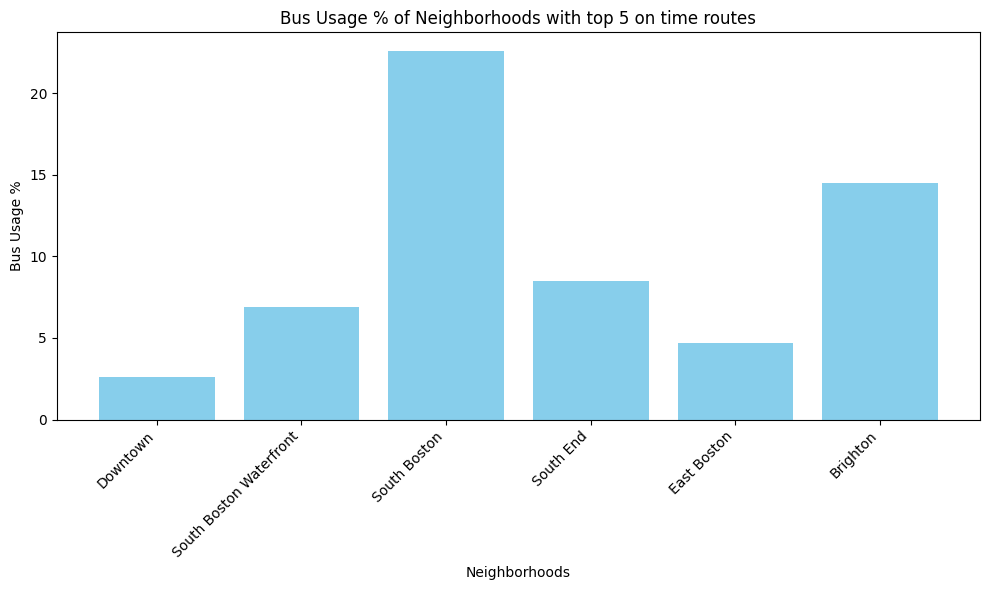

In [21]:
import matplotlib.pyplot as plt
print(combined_df['Place'].values)
top_10_on_time_routes_neighbourhoods = [i for i in top_10_on_time_routes_neighbourhoods if i in combined_df['Place'].values]
print(top_10_on_time_routes_neighbourhoods)
# top 10 most late routes against median age
median_age_list = []
for i in top_10_on_time_routes_neighbourhoods:
    if i in combined_df['Place'].values:
        median_age_list.append(combined_df[combined_df['Place'] == i]['Bus'].values[0])


plt.figure(figsize=(10, 6))
plt.bar(top_10_on_time_routes_neighbourhoods, median_age_list, color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Bus Usage %')
plt.title('Bus Usage % of Neighborhoods with top 5 on time routes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
income_data = {
    'Allston': 34149,
    'Back Bay': 110677,
    'Beacon Hill': 100005,
    'Brighton': 41261,
    'Charlestown': 75339,
    'Dorchester': 29767,
    'Downtown': 80057,
    'East Boston': 31473,
    'Fenway': 28021,
    'Hyde Park': 32744,
    'Jamaica Plain': 51655,
    'Longwood': 7975,
    'Mattapan': 28356,
    'Mission Hill': 23446,
    'North End': 89696,
    'Roslindale': 41252,
    'Roxbury': 20978,
    'South Boston': 64745,
    'South Boston Waterfront': 129651,
    'South End': 83609,
    'West End': 77069,
    'West Roxbury': 47836
}

income_data_df = pd.DataFrame(income_data, index=[0]).transpose()
income_data_df = income_data_df.reset_index()
income_data_df.columns = ['Neighborhood', 'Income']

In [23]:
combined_df = pd.merge(neighborhood_data_df, income_data_df, left_on='Place', right_on='Neighborhood', how='outer')

# Drop the redundant 'Neighborhood' column
combined_df = combined_df.drop(columns='Neighborhood')

combined_df['Income'] = pd.to_numeric(combined_df['Income'])
# Display the combined dataframe
# print(combined_df[['Place', 'num_stops', 'Bus']].dropna().sort_values(by='Bus', ascending=False))

from tabulate import tabulate
combined_df = combined_df[['Place', 'num_stops', 'Income']].dropna().sort_values(by='Income', ascending=False)
# Assuming 'combined_df' is the combined dataframe
table = tabulate(combined_df,
                 headers='keys', tablefmt='pretty', showindex=False)

print(table)

+-------------------------+-----------+----------+
|          Place          | num_stops |  Income  |
+-------------------------+-----------+----------+
| South Boston Waterfront |    28     | 129651.0 |
|        Back Bay         |    49     | 110677.0 |
|       Beacon Hill       |     7     | 100005.0 |
|        North End        |    12     | 89696.0  |
|        South End        |    85     | 83609.0  |
|        Downtown         |    26     | 80057.0  |
|        West End         |    12     | 77069.0  |
|       Charlestown       |    876    | 75339.0  |
|      South Boston       |    144    | 64745.0  |
|      Jamaica Plain      |    66     | 51655.0  |
|      West Roxbury       |    234    | 47836.0  |
|        Brighton         |    730    | 41261.0  |
|       Roslindale        |    104    | 41252.0  |
|         Allston         |    507    | 34149.0  |
|        Hyde Park        |    375    | 32744.0  |
|       East Boston       |   1229    | 31473.0  |
|       Dorchester        |    

['South Boston Waterfront' 'Back Bay' 'Beacon Hill' 'North End'
 'South End' 'Downtown' 'West End' 'Charlestown' 'South Boston'
 'Jamaica Plain' 'West Roxbury' 'Brighton' 'Roslindale' 'Allston'
 'Hyde Park' 'East Boston' 'Dorchester' 'Mattapan' 'Fenway' 'Mission Hill'
 'Roxbury' 'Longwood']
['South End', 'Fenway', 'Longwood', 'Mission Hill', 'Brighton', 'Allston', 'Roxbury', 'Charlestown']


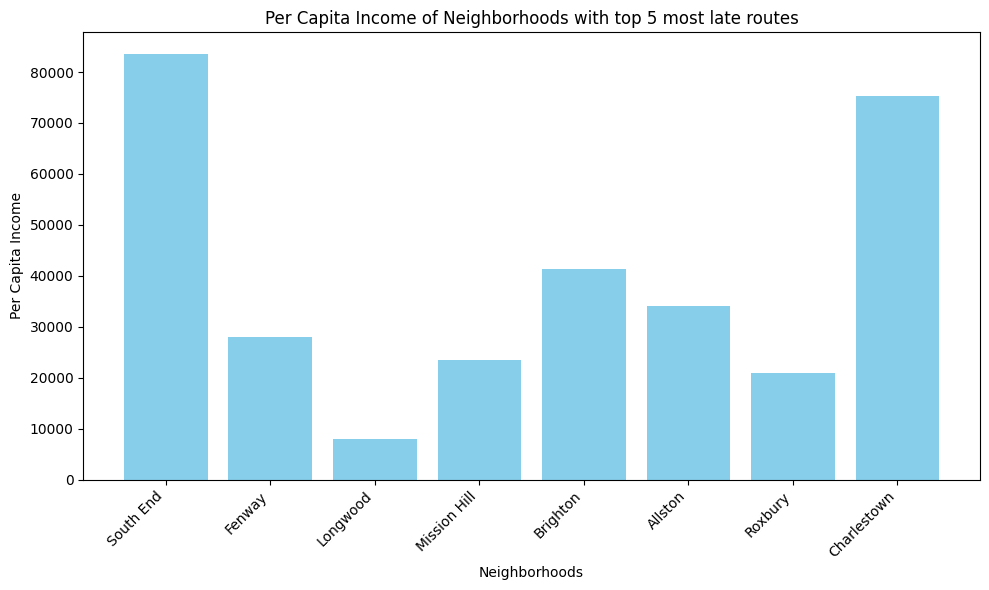

In [24]:
import matplotlib.pyplot as plt
print(combined_df['Place'].values)
top_10_most_late_routes_neighbourhoods = [i for i in top_10_most_late_routes_neighbourhoods if i in combined_df['Place'].values]
print(top_10_most_late_routes_neighbourhoods)
# top 10 most late routes against median age
median_age_list = []
for i in top_10_most_late_routes_neighbourhoods:
    if i in combined_df['Place'].values:
        median_age_list.append(combined_df[combined_df['Place'] == i]['Income'].values[0])


plt.figure(figsize=(10, 6))
plt.bar(top_10_most_late_routes_neighbourhoods, median_age_list, color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Per Capita Income')
plt.title('Per Capita Income of Neighborhoods with top 5 most late routes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

['South Boston Waterfront' 'Back Bay' 'Beacon Hill' 'North End'
 'South End' 'Downtown' 'West End' 'Charlestown' 'South Boston'
 'Jamaica Plain' 'West Roxbury' 'Brighton' 'Roslindale' 'Allston'
 'Hyde Park' 'East Boston' 'Dorchester' 'Mattapan' 'Fenway' 'Mission Hill'
 'Roxbury' 'Longwood']
['Downtown', 'South Boston Waterfront', 'South Boston', 'South End', 'East Boston', 'Brighton']


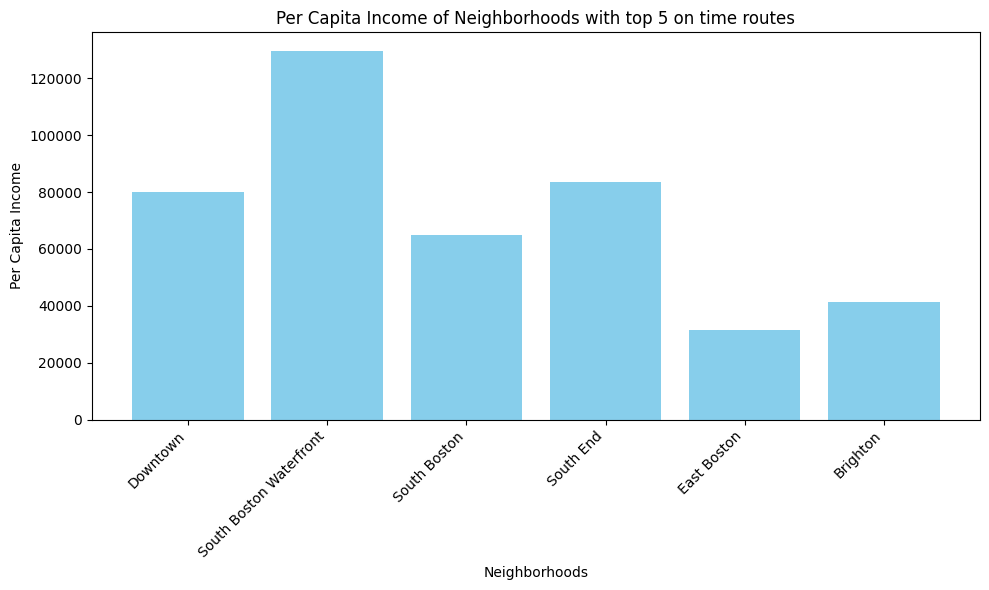

In [25]:
import matplotlib.pyplot as plt
print(combined_df['Place'].values)
top_10_on_time_routes_neighbourhoods = [i for i in top_10_on_time_routes_neighbourhoods if i in combined_df['Place'].values]
print(top_10_on_time_routes_neighbourhoods)
# top 10 most late routes against median age
median_age_list = []
for i in top_10_on_time_routes_neighbourhoods:
    if i in combined_df['Place'].values:
        median_age_list.append(combined_df[combined_df['Place'] == i]['Income'].values[0])


plt.figure(figsize=(10, 6))
plt.bar(top_10_on_time_routes_neighbourhoods, median_age_list, color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Per Capita Income')
plt.title('Per Capita Income of Neighborhoods with top 5 on time routes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
poverty_rate_data = poverty_rate = {
    'Allston': 27.9,
    'Back Bay': 11.9,
    'Beacon Hill': 6.4,
    'Brighton': 17.2,
    'Charlestown': 14.4,
    'Dorchester': 22.2,
    'Downtown': 21.1,
    'East Boston': 16.0,
    'Fenway': 39.2,
    'Hyde Park': 14.9,
    'Jamaica Plain': 12.8,
    'Longwood': 29.7,
    'Mattapan': 20.1,
    'Mission Hill': 37.0,
    'North End': 8.0,
    'Roslindale': 9.8,
    'Roxbury': 31.7,
    'South Boston': 14.1,
    'South Boston Waterfront': 5.9,
    'South End': 19.9,
    'West End': 14.0,
    'West Roxbury': 6.3
}

poverty_rate_data_df = pd.DataFrame(poverty_rate_data, index=[0]).transpose()
poverty_rate_data_df = poverty_rate_data_df.reset_index()
poverty_rate_data_df.columns = ['Neighborhood', 'Poverty Rate']


In [27]:
combined_df = pd.merge(neighborhood_data_df, poverty_rate_data_df, left_on='Place', right_on='Neighborhood', how='outer')


In [28]:
# Drop the redundant 'Neighborhood' column
combined_df = combined_df.drop(columns='Neighborhood')

combined_df['Income'] = pd.to_numeric(combined_df['Poverty Rate'])
# Display the combined dataframe
# print(combined_df[['Place', 'num_stops', 'Bus']].dropna().sort_values(by='Bus', ascending=False))

from tabulate import tabulate
combined_df = combined_df[['Place', 'num_stops', 'Poverty Rate']].dropna().sort_values(by='Poverty Rate', ascending=False)
# Assuming 'combined_df' is the combined dataframe
table = tabulate(combined_df,
                 headers='keys', tablefmt='pretty', showindex=False)

print(table)

+-------------------------+-----------+--------------+
|          Place          | num_stops | Poverty Rate |
+-------------------------+-----------+--------------+
|         Fenway          |    66     |     39.2     |
|      Mission Hill       |    78     |     37.0     |
|         Roxbury         |    130    |     31.7     |
|        Longwood         |    40     |     29.7     |
|         Allston         |    507    |     27.9     |
|       Dorchester        |    487    |     22.2     |
|        Downtown         |    26     |     21.1     |
|        Mattapan         |    715    |     20.1     |
|        South End        |    85     |     19.9     |
|        Brighton         |    730    |     17.2     |
|       East Boston       |   1229    |     16.0     |
|        Hyde Park        |    375    |     14.9     |
|       Charlestown       |    876    |     14.4     |
|      South Boston       |    144    |     14.1     |
|        West End         |    12     |     14.0     |
|      Jam

['Fenway' 'Mission Hill' 'Roxbury' 'Longwood' 'Allston' 'Dorchester'
 'Downtown' 'Mattapan' 'South End' 'Brighton' 'East Boston' 'Hyde Park'
 'Charlestown' 'South Boston' 'West End' 'Jamaica Plain' 'Back Bay'
 'Roslindale' 'North End' 'Beacon Hill' 'West Roxbury'
 'South Boston Waterfront']
['South End', 'Fenway', 'Longwood', 'Mission Hill', 'Brighton', 'Allston', 'Roxbury', 'Charlestown']


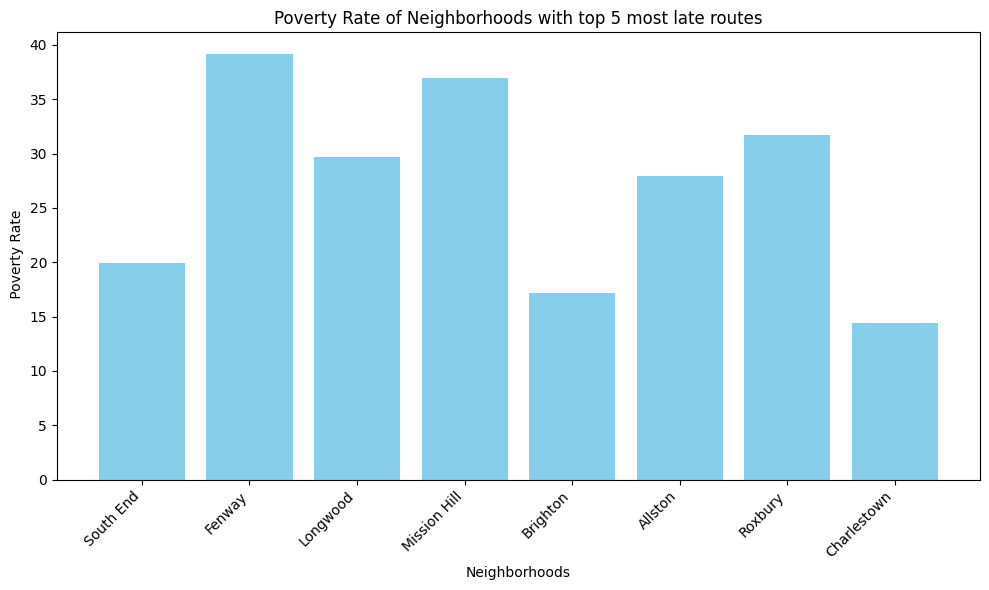

In [29]:
import matplotlib.pyplot as plt
print(combined_df['Place'].values)
top_10_most_late_routes_neighbourhoods = [i for i in top_10_most_late_routes_neighbourhoods if i in combined_df['Place'].values]
print(top_10_most_late_routes_neighbourhoods)
# top 10 most late routes against median age
median_age_list = []
for i in top_10_most_late_routes_neighbourhoods:
    if i in combined_df['Place'].values:
        median_age_list.append(combined_df[combined_df['Place'] == i]['Poverty Rate'].values[0])


plt.figure(figsize=(10, 6))
plt.bar(top_10_most_late_routes_neighbourhoods, median_age_list, color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel(' Poverty Rate')
plt.title('Poverty Rate of Neighborhoods with top 5 most late routes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

['Fenway' 'Mission Hill' 'Roxbury' 'Longwood' 'Allston' 'Dorchester'
 'Downtown' 'Mattapan' 'South End' 'Brighton' 'East Boston' 'Hyde Park'
 'Charlestown' 'South Boston' 'West End' 'Jamaica Plain' 'Back Bay'
 'Roslindale' 'North End' 'Beacon Hill' 'West Roxbury'
 'South Boston Waterfront']
['Downtown', 'South Boston Waterfront', 'South Boston', 'South End', 'East Boston', 'Brighton']


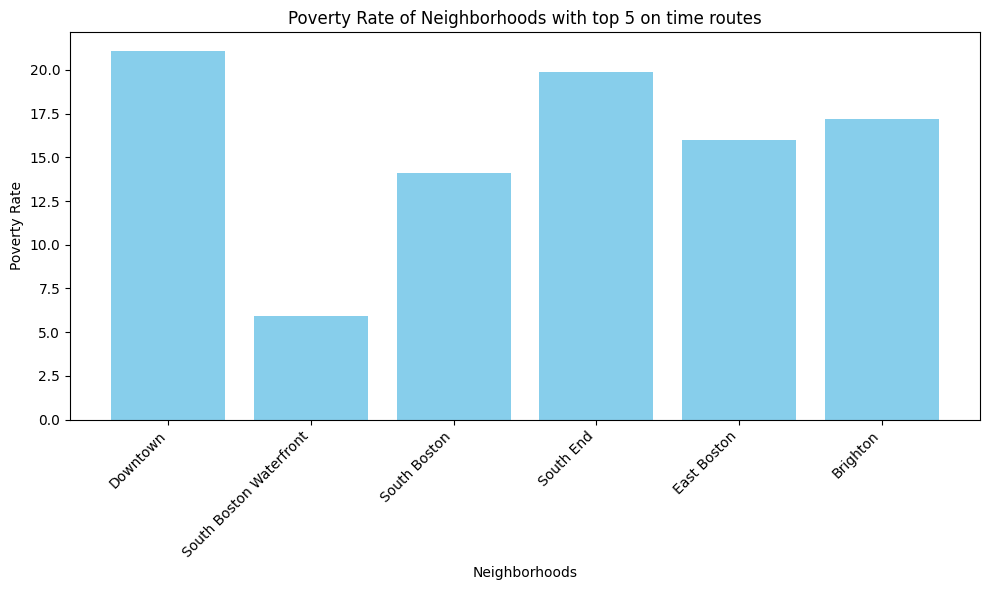

In [30]:
import matplotlib.pyplot as plt
print(combined_df['Place'].values)
top_10_on_time_routes_neighbourhoods = [i for i in top_10_on_time_routes_neighbourhoods if i in combined_df['Place'].values]
print(top_10_on_time_routes_neighbourhoods)
# top 10 most late routes against median age
median_age_list = []
for i in top_10_on_time_routes_neighbourhoods:
    if i in combined_df['Place'].values:
        median_age_list.append(combined_df[combined_df['Place'] == i]['Poverty Rate'].values[0])


plt.figure(figsize=(10, 6))
plt.bar(top_10_on_time_routes_neighbourhoods, median_age_list, color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate of Neighborhoods with top 5 on time routes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()